In [1]:
# Import dependencies
import random
import numpy as np
import torch
import torch.nn as nn

# You can find Alfredo's plotting code in plot_lib.py in this directory .
# Download it along with this assignment and keep it in the same directory.
from plot_lib import set_default, show_scatterplot, plot_bases

from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
def warm_up():
    
    #raise NotImplementedError()
    
    X = torch.full((13,13),1)
    X[:,1::5].fill_(2)
    X[1::5,:].fill_(2)
    X[3::5,3::5].fill_(3)
    X[3::5,4::5].fill_(3)
    X[4::5,3::5].fill_(3)
    X[4::5,4::5].fill_(3)
    return(X)

# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.]])


# 2. To Loop or not to loop

The motivation for the following three sub-questions is to get you to think critically about how to write your deep learning code. These sorts of choices can make the difference between tractable and intractable model training.

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops with simple indexing but no advanced indexing/slicing, that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [5]:
def mul_row_loop(input_tensor):
    r = input_tensor.size(0)
    c = input_tensor.size(1)
    for i in range(1,r):
        for j in range(c):
            input_tensor[i,j].fill_(input_tensor[i,j]*(i+1))
    return(input_tensor)
    raise NotImplementedError()

 ## Testing the function

In [6]:
t = torch.full((8, 4), 3.0)
mul_row_loop(t)

tensor([[ 3.,  3.,  3.,  3.],
        [ 6.,  6.,  6.,  6.],
        [ 9.,  9.,  9.,  9.],
        [12., 12., 12., 12.],
        [15., 15., 15., 15.],
        [18., 18., 18., 18.],
        [21., 21., 21., 21.],
        [24., 24., 24., 24.]])

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [7]:
def mul_row_fast(input_tensor):
    r = input_tensor.size(0)
    c = input_tensor.size(1)
    b = torch.arange(1, r+1, dtype=torch.float)
    b = b.expand((c,r)).t()
    return(torch.mul(input_tensor,b))
    raise NotImplementedError()
    


 ## Testing the function

In [8]:
t = torch.full((9,7), 4.0)
mul_row_fast(t)

tensor([[ 4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [12., 12., 12., 12., 12., 12., 12.],
        [16., 16., 16., 16., 16., 16., 16.],
        [20., 20., 20., 20., 20., 20., 20.],
        [24., 24., 24., 24., 24., 24., 24.],
        [28., 28., 28., 28., 28., 28., 28.],
        [32., 32., 32., 32., 32., 32., 32.],
        [36., 36., 36., 36., 36., 36., 36.]])

# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [9]:
from time import perf_counter
def times(input_tensor):
    
    start1 = perf_counter()
    mul_row_loop(input_tensor)
    end1 = perf_counter()
    
    start2 = perf_counter()
    mul_row_fast(input_tensor)
    end2 = perf_counter()
    
    return (end1-start1, end2-start2)
    raise NotImplementedError()


In [10]:
# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000,400)
time_1, time_2 = times(input_tensor)

print('runtime of mul_row_loop is {} and runtime of mul_row_fast is {}'.format(time_1, time_2))

runtime of mul_row_loop is 9.667203758000001 and runtime of mul_row_fast is 0.000800424000001243


# 3. Non-linearities

In this section, we explore similar concepts to Lab 1 and get comfortable initializing modules like nn.Linear and using non-linearities in PyTorch.

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

You can find Alfredo's plotting code in plot_lib.py in this directory. Download it along with this assignment and keep it in the same directory.

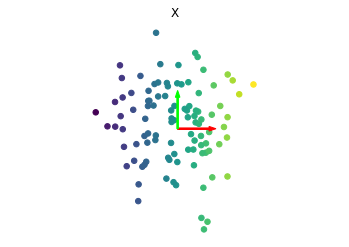

In [11]:
# Input data
X = torch.randn(100,2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

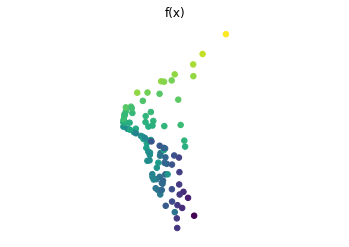

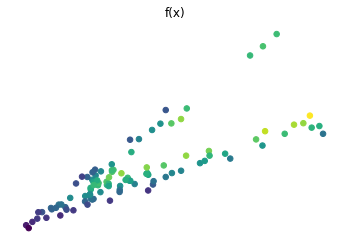

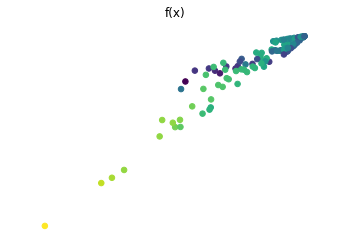

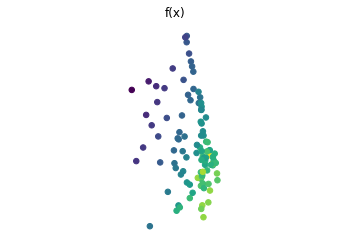

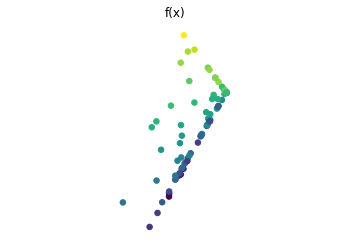

In [12]:
# create 1-layer neural networks with ReLU activation

n_hidden = 5

for i in range(5):
    linear_fc_relu = nn.Sequential(
                 nn.Linear(2,n_hidden),
                 nn.ReLU(),
                 nn.Linear(n_hidden, 2)
    )


# Visualize: TODO
    linear_fc_relu.to(device)
    with torch.no_grad():
        Y = linear_fc_relu(X)
    show_scatterplot(Y, colors, title='f(x)')
 

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ exp[-x]}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

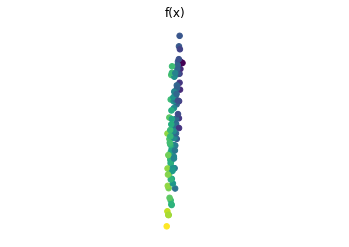

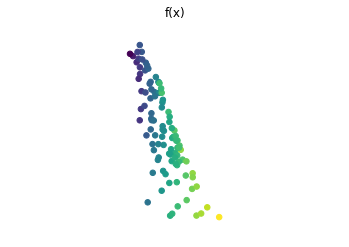

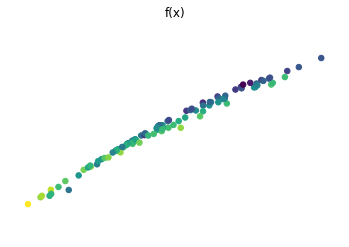

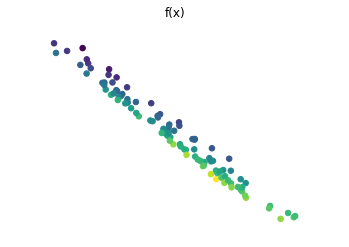

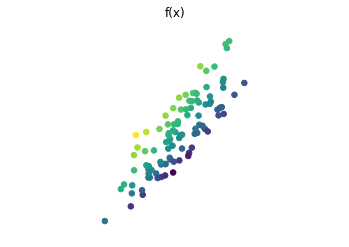

In [13]:
# create 1-layer neural networks with Sigmoid activation
# linear_fc_sigmoid = TODO

n_hidden = 5

for i in range(5):
    linear_fc_relu = nn.Sequential(
                 nn.Linear(2,n_hidden),
                 nn.Sigmoid(),
                 nn.Linear(n_hidden, 2)
    )


# Visualize: TODO
    linear_fc_relu.to(device)
    with torch.no_grad():
        Y = linear_fc_relu(X)
    show_scatterplot(Y, colors, title='f(x)')
    

